Source: https://catalog.data.gov/dataset/2015-street-tree-census-tree-data
<br>
Source: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

The 2015 Tree Census dataset for New York City is collected by volunteers and staff members from NYC Parks & Rec. <br>
Here, we clean and standardize the data.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2015-tree-census.csv') # import data
tree = data # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
tree_id             683788 non-null int64
block_id            683788 non-null int64
created_at          683788 non-null object
tree_dbh            683788 non-null int64
stump_diam          683788 non-null int64
curb_loc            683788 non-null object
status              683788 non-null object
health              652172 non-null object
spc_latin           652169 non-null object
spc_common          652169 non-null object
steward             652173 non-null object
guards              652172 non-null object
sidewalk            652172 non-null object
user_type           683788 non-null object
problems            652124 non-null object
root_stone          683788 non-null object
root_grate          683788 non-null object
root_other          683788 non-null object
trunk_wire          683788 non-null object
trnk_light          683788 non-null object
trnk_other          683788 non-nu

In [4]:
tree.shape

(683788, 45)

In [5]:
# display the first five rows

tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [6]:
# display the last three rows

tree.tail(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09
683787,200607,306527,09/03/2015,23,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4134100,New York,40.732165,-73.787526,1.043136e+06,206095.5383,24.0,1341.0,4153657.0,4.071360e+09


In [7]:
# display the columns

tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [8]:
# drop any duplicates

tree = tree.drop_duplicates()

tree.shape # there does not appear to be any duplicates

(683788, 45)

In [9]:
# display null values

tree.isnull().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [10]:
# drop columns that are inconsistent or not useful for analysis

drop_list = ['block_id', 'created_at', 'state', 'borocode', 'postcode', 'zip_city', 'user_type','community board', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']

In [11]:
tree.drop(drop_list, axis='columns', inplace=True)

In [12]:
tree.isnull().sum() # confirm drops

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
address           0
borough           0
dtype: int64

Since some rows are missing values, we investigate the reason behind the empty fields and suggest alternative ways to fill in the gaps.
<br >
If there are erroneous rows, they shall be removed.

If the tree is a stump or dead, then there is no way to discern the health of the tree. There is also no way to know the Latin/Scientific or common name of the tree (also irrelevant). Likewise, stewards are not indicated for dead trees nor are there guards and sidewalk flags.
<br>
Since the numbers missing for the above columns are roughly the same, the next step is to investigate the small discrepancies.

In [13]:
tree.status.value_counts(dropna=False)

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [14]:
tree.health.value_counts(dropna=False) # show any missing data

# there are many more trees in 'Good' health than 'Fair' or 'Poor' or 'NaN' / Dead
# must balance the data

Good    528850
Fair     96504
NaN      31616
Poor     26818
Name: health, dtype: int64

Since 31616 rows lack 'health' data and 31615 rows are classified as Stump or Dead in terms of 'status', there may be a row that does not contain 'health' data and is marked as Alive.
<br >
<br >
Let's replace the health column rows that lack data with Dead since a tree that is a stump is probably deceased.
<br >
Note: this is only for rows that have a status labeled as Stump or Dead (since status is not missing any values).

In [15]:
# filter rows that have a Dead or Stump status and missing health (NaN)

miss_health = tree[(tree.health.isnull()) & (tree.status == 'Alive')]
miss_health

# located the row!
# this row can be removed since the health is unknown, despite the tree being alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
32864,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,None,None,...,No,No,No,No,No,No,No,No,84 LUCILLE AVENUE,Staten Island


In [16]:
# removing the row

tree = tree.drop(tree.index[32864])

tree[tree['tree_id'] == 245041] # confirmed

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough


The City of New York mentions that dead trees and stumps do not have data recorded for the following fields:
<br >
steward (31615)
<br >
guards (31616)
<br >
sidewalk (31616). 
<br >
Let's investigate and locate any rows that lack data or may be incorrectly labeled.

In [17]:
guards_sidewalk = tree[(tree.guards.isnull())  & (tree.sidewalk.isnull())]
guards_sidewalk.shape

# this is consistent with the count for 'steward'

(31615, 23)

In [18]:
# check for when guards is null and sidewalk is not

guards_null = tree[(tree.guards.isnull()) & (~tree.sidewalk.isnull())]
guards_null

# tree is alive and in poor health and is not indentified (species)
# will delete this row

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
427537,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,...,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,Queens


In [19]:
# dropping the row

tree = tree.drop(index=427537)

tree[tree['tree_id'] == 630814] # confirmed

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough


In [20]:
# check when guards is not null and sidewalk is

sidewalk_null = tree[(~tree.guards.isnull()) & (tree.sidewalk.isnull())]
sidewalk_null

# tree is alive, in good health, and is identified
# will delete this row

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
346236,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,...,No,No,No,No,No,No,No,No,1220 LIBERTY AVENUE,Brooklyn


In [21]:
# dropping the row

tree = tree.drop(index=346236)

tree[tree['tree_id'] == 540677] # confirmed

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough


It looks like there is a row without 'guard' data and another row without 'sidewalk' data. Put together, they consistently show 31,615 rows that lack data, same as steward.

In [22]:
# look for row with sidewalk, without steward

steward_sidewalk_null = tree[(~tree.steward.isnull()) & (tree.sidewalk.isnull())] # none

# look for row with guards, without steward

guards_guards_null = tree[(~tree.steward.isnull()) & (tree.guards.isnull())] # none

# look for row with steward

steward_null_sidewalk = tree[(tree.steward.isnull()) & (~tree.sidewalk.isnull())] # none
steward_null_guards = tree[(tree.steward.isnull()) & (~tree.guards.isnull())] # none

In [23]:
tree.isnull().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31615
spc_latin     31618
spc_common    31618
steward       31615
guards        31615
sidewalk      31615
problems      31663
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
address           0
borough           0
dtype: int64

In [24]:
tree.shape

(683785, 23)

In [25]:
# remove all rows where the 'status' of the tree is 'Stump'
# dropping rows that contain a specific value

tree = tree[tree.status != 'Stump']

# drop rows where 'status' is 'Dead'

tree = tree[tree.status != 'Dead']

# new tree dataframe includes all rows where 'status' is NOT 'Stump' or 'Dead'

tree.shape

(652170, 23)

In [26]:
# removing the column 'stump_diam' since all trees that are 'Alive' have a diameter of 0

tree.drop('stump_diam', axis='columns', inplace=True)

In [27]:
# check for null values again

tree.isnull().sum()

tree_id        0
tree_dbh       0
curb_loc       0
status         0
health         0
spc_latin      4
spc_common     4
steward        0
guards         0
sidewalk       0
problems      48
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
address        0
borough        0
dtype: int64

In [28]:
# remove the 'status' column too since all trees are 'Alive'

tree.drop('status', axis='columns', inplace=True)

After removing the rows where the tree is 'Dead' or 'Stump', most columns no longer contain missing data. For the 'problems' column, the empty ones will be removed since there is no way to discern whether or not the tree had any problems due to lack of knowledge. The same will be done for the 'spc_latin' and 'spc_common' columns. Since the sample size is large, removing these columns is okay.

In [29]:
# locate rows with empty 'spc_latin' and 'spc_common'

null_spc = tree[(tree.spc_latin.isnull()) & (tree.spc_common.isnull())]
null_spc

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
356532,562532,4,OnCurb,Good,NaN,NaN,1or2,None,NoDamage,Stones,...,No,No,No,No,No,No,No,No,157-021 12 AVENUE,Queens
431405,651014,40,OnCurb,Good,NaN,NaN,None,None,Damage,Stones,...,No,No,No,No,No,No,No,No,81-015 91 AVENUE,Queens
608574,47941,5,OnCurb,Good,NaN,NaN,1or2,None,NoDamage,None,...,No,No,No,No,No,No,No,No,61-032 78 STREET,Queens
656953,150745,3,OnCurb,Good,NaN,NaN,1or2,None,Damage,None,...,No,No,No,No,No,No,No,No,662 EAST 234 STREET,Bronx


In [30]:
# locate rows where problems is NaN

problems_null = tree[tree.problems.isnull()]

problems_null.head()

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
120249,332668,30,OffsetFromCurb,Fair,Quercus palustris,pin oak,1or2,None,NoDamage,NaN,...,No,No,No,No,No,No,No,No,37-001 69 STREET,Queens
121443,332669,28,OffsetFromCurb,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,NaN,...,No,No,No,No,No,No,No,No,69-002 37 AVENUE,Queens
121639,332670,24,OffsetFromCurb,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,NaN,...,No,No,No,No,No,No,No,No,69-002 37 AVENUE,Queens
133418,332693,11,OffsetFromCurb,Good,Quercus palustris,pin oak,1or2,None,NoDamage,NaN,...,No,No,No,No,No,No,No,No,69-002 37 AVENUE,Queens
133760,332692,15,OffsetFromCurb,Good,Quercus palustris,pin oak,None,None,NoDamage,NaN,...,No,No,No,No,No,No,No,No,69-002 37 AVENUE,Queens


In [31]:
# drop rows where data is missing

tree = tree.dropna()

# final check for missing values 

tree.isnull().sum()

tree_id       0
tree_dbh      0
curb_loc      0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
address       0
borough       0
dtype: int64

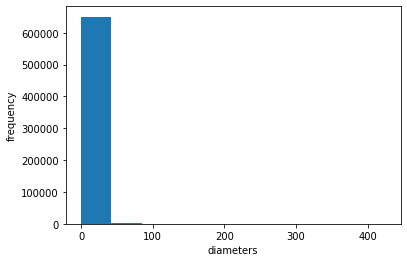

In [48]:
# plotting the distribution of tree diameters, it's very skewed to the right

tree['tree_dbh'].plot(kind='hist', bins=10)
_ = plt.xlabel('diameters')
_ = plt.ylabel('frequency')

In [33]:
# we look at the value distribution in a second way

tree['tree_dbh'].describe()

count    652118.000000
mean         11.709684
std           8.634257
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

In [35]:
# let's plot the 'health' of the trees

tree.health.value_counts(dropna=False)

Good    528805
Fair     96497
Poor     26816
Name: health, dtype: int64

In [36]:
# we'll create a new column, 'health_num' and 
# assign 1 - 'Poor', 2 - 'Fair', and 3 - 'Good'
# as indicators of the tree's health

# create the function that assigns values to 'health' conditions

def health_to_num(x):
    if x == 'Poor':
        return 1
    if x == 'Fair':
        return 2
    if x == 'Good':
        return 3
    
tree['health_num'] = tree['health'].apply(health_to_num)

In [37]:
tree.head() # verify the new column

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough,health_num
0,180683,3,OnCurb,Fair,Acer rubrum,red maple,None,None,NoDamage,None,...,No,No,No,No,No,No,No,108-005 70 AVENUE,Queens,2
1,200540,21,OnCurb,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,...,No,No,No,No,No,No,No,147-074 7 AVENUE,Queens,2
2,204026,3,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,...,No,No,No,No,No,No,No,390 MORGAN AVENUE,Brooklyn,3
3,204337,10,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,...,No,No,No,No,No,No,No,1027 GRAND STREET,Brooklyn,3
4,189565,21,OnCurb,Good,Tilia americana,American linden,None,None,Damage,Stones,...,No,No,No,No,No,No,No,603 6 STREET,Brooklyn,3


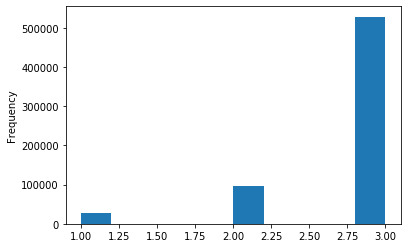

In [51]:
# plot the results

tree['health_num'].plot(kind='hist')

In [39]:
tree.steward.value_counts() # looking at categories for 'steward'

None       487797
1or2       143529
3or4        19182
4orMore      1610
Name: steward, dtype: int64

In [40]:
# convert the categorical column 'steward' to numeric by creating a new column 'steward_num'

def ste_num(y):
    if y == 'None':
        return 0
    if y == '1or2':
        return 12
    if y == '3or4':
        return 34
    if y == '4orMore':
        return 59
    
tree['steward_num'] = tree['steward'].apply(ste_num)

In [41]:
tree.head()

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough,health_num,steward_num
0,180683,3,OnCurb,Fair,Acer rubrum,red maple,None,None,NoDamage,None,...,No,No,No,No,No,No,108-005 70 AVENUE,Queens,2,0
1,200540,21,OnCurb,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,...,No,No,No,No,No,No,147-074 7 AVENUE,Queens,2,0
2,204026,3,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,...,No,No,No,No,No,No,390 MORGAN AVENUE,Brooklyn,3,12
3,204337,10,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,...,No,No,No,No,No,No,1027 GRAND STREET,Brooklyn,3,0
4,189565,21,OnCurb,Good,Tilia americana,American linden,None,None,Damage,Stones,...,No,No,No,No,No,No,603 6 STREET,Brooklyn,3,0


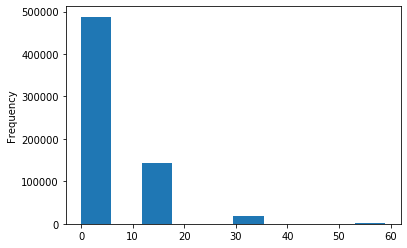

In [52]:
# plot the results

tree.steward_num.plot(kind='hist')

In [42]:
tree.curb_loc.value_counts() # display results for 'curb_loc'

OnCurb            626254
OffsetFromCurb     25864
Name: curb_loc, dtype: int64

In [43]:
# convert categorical to numerical

def curb_num(z):
    if z == 'OnCurb':
        return 1
    if z == 'OffsetFromCurb':
        return 0
    
tree['curb_loc_num'] = tree['curb_loc'].apply(curb_num)

In [44]:
tree.head()

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough,health_num,steward_num,curb_loc_num
0,180683,3,OnCurb,Fair,Acer rubrum,red maple,None,None,NoDamage,None,...,No,No,No,No,No,108-005 70 AVENUE,Queens,2,0,1
1,200540,21,OnCurb,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,...,No,No,No,No,No,147-074 7 AVENUE,Queens,2,0,1
2,204026,3,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,...,No,No,No,No,No,390 MORGAN AVENUE,Brooklyn,3,12,1
3,204337,10,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,...,No,No,No,No,No,1027 GRAND STREET,Brooklyn,3,0,1
4,189565,21,OnCurb,Good,Tilia americana,American linden,None,None,Damage,Stones,...,No,No,No,No,No,603 6 STREET,Brooklyn,3,0,1


In [45]:
tree.guards.value_counts() # display results for 'guards'

None       572254
Helpful     51864
Harmful     20252
Unsure       7748
Name: guards, dtype: int64

In [46]:
# convert categorical to numerical

def guards_num(x):
    if x == 'None':
        return 1
    if x == 'Helpful':
        return 3
    if x == 'Harmful':
        return 0
    if x == 'Unsure':
        return 2
    
tree['guards_num'] = tree.guards.apply(guards_num)

In [47]:
tree.head()

,tree_id,tree_dbh,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,problems,...,trnk_other,brch_light,brch_shoe,brch_other,address,borough,health_num,steward_num,curb_loc_num,guards_num
0,180683,3,OnCurb,Fair,Acer rubrum,red maple,None,None,NoDamage,None,...,No,No,No,No,108-005 70 AVENUE,Queens,2,0,1,1
1,200540,21,OnCurb,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,...,No,No,No,No,147-074 7 AVENUE,Queens,2,0,1,1
2,204026,3,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,...,No,No,No,No,390 MORGAN AVENUE,Brooklyn,3,12,1,1
3,204337,10,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,...,No,No,No,No,1027 GRAND STREET,Brooklyn,3,0,1,1
4,189565,21,OnCurb,Good,Tilia americana,American linden,None,None,Damage,Stones,...,No,No,No,No,603 6 STREET,Brooklyn,3,0,1,1


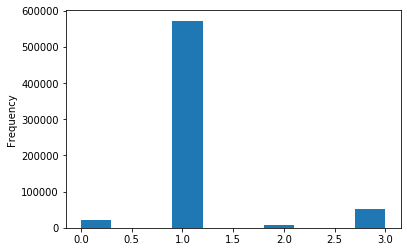

In [54]:
# plot the results

tree.guards_num.plot(kind='hist')